## PCA Implementation

I'll go through the visualization of the geometric intuition as well as variance intuition of PCA.

I'll explore KNN+PCA and Tree+PCA.

In [7]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

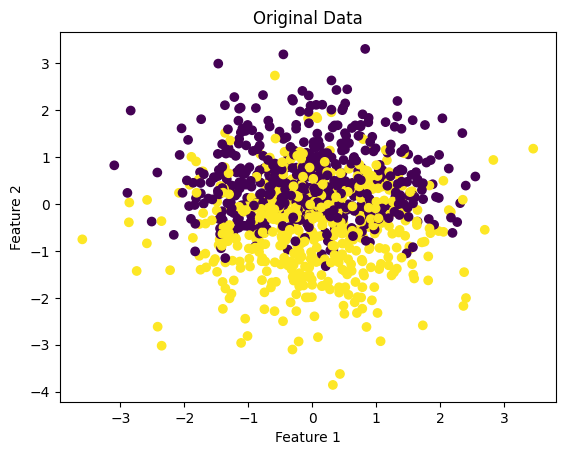

In [ ]:
## visualization of the geometric intuition of PCA

import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.show()


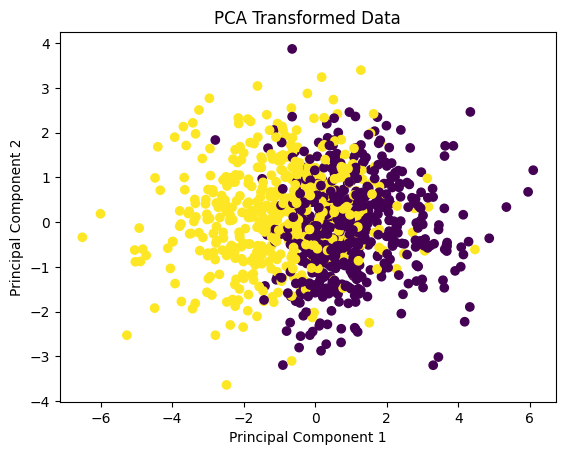

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data')
plt.show()

In [12]:
pca.components_

array([[ 0.00202744,  0.56514995,  0.02162068,  0.02279994, -0.03724984,
        -0.49707294, -0.01500235,  0.01660596, -0.00220747, -0.01676383,
        -0.03003238,  0.02776307,  0.01996192,  0.05391538, -0.33213277,
         0.0067984 ,  0.01280343, -0.00822503,  0.56083823, -0.01583578],
       [ 0.43446668,  0.05510688, -0.04707753, -0.26773658, -0.21843636,
         0.19881139,  0.0896622 , -0.15947457,  0.12040174, -0.39977539,
        -0.0749588 , -0.13932437,  0.25914809,  0.16560806, -0.31329341,
        -0.19073452,  0.13088796,  0.33024821, -0.08425855,  0.22766782]])

In [13]:
pca.explained_variance_ratio_

array([0.15219423, 0.05982789])

In [ ]:
## observations

#1. pc1 captures the majority of variance
#2. pc2 captures very little

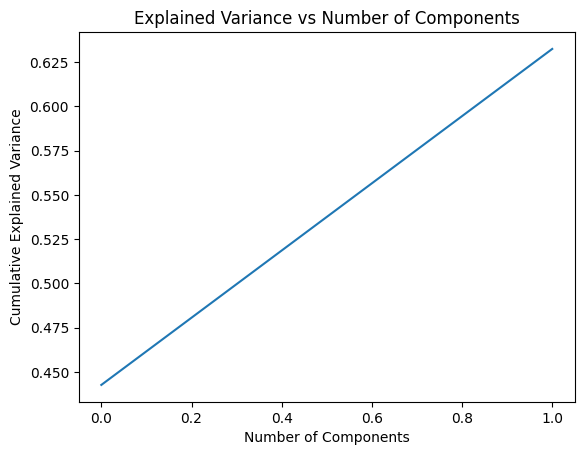

In [15]:
## exploring the variance plot

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

X_scaled = scaler.fit_transform(X)
pca.fit(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()

In [16]:
## knn + pca

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
print("Accuracy without PCA:", knn.score(X_test, y_test))

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn.fit(X_train_pca, y_train)
print("Accuracy with PCA:", knn.score(X_test_pca, y_test))

Accuracy without PCA: 0.9473684210526315
Accuracy with PCA: 0.956140350877193


In [20]:
## observation: pca+knn performs better than knn alone, likely due to noise reduction and removal of redundant features

In [18]:
## trees + pca

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Accuracy without PCA:", tree.score(X_test, y_test))

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

tree.fit(X_train_pca, y_train)
print("Accuracy with PCA:", tree.score(X_test_pca, y_test))

Accuracy without PCA: 0.9385964912280702
Accuracy with PCA: 0.9210526315789473


In [19]:
## observation: pca+tree performs worse than tree alone, likely because trees are less sensitive to noise and redundant features, and PCA may have removed some important information.